# P/E ratio and Stock Market return

This project's goal is to show the close relationship between P/E ratios in a given year and the return in the next 10 years from that given year.
This data set consists of monthly stock price, dividends, and earnings data and the consumer price index (to allow conversion to real values), all starting January 1871.

I am using a Data set from Robert J. Shiller. http://www.econ.yale.edu/~shiller/data.htm.

Emanuele Corà

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [265]:
df = pd.read_excel("ie_data.xls", sheet_name="Data", encoding="utf-8")

In [267]:
df.columns = ["Date", "Price", "Dividends", "Earnings", "CPI", "Date Fraction", "Long Interest Rate GS10", 
              "Real price", "Real Dividend", "Real Total Return Price", "Real Earnings", "Real TR Scaled Earnings", 
             "CAPE ratio", "NAN1", "TR CAPE ratio", "NAN2"]

In [228]:
df = df[["Date", "Price", "Dividends", "Earnings", "Long Interest Rate GS10", "CAPE ratio"]]

In [229]:
df.dropna(inplace=True)

In [230]:
df.drop([6], inplace=True)

In [231]:
df

,Date,Price,Dividends,Earnings,Long Interest Rate GS10,CAPE ratio
127,1881.01,6.19,0.265,0.4858,3.7,18.474
128,1881.02,6.17,0.27,0.4817,3.69333,18.1473
129,1881.03,6.24,0.275,0.4775,3.68667,18.2701
130,1881.04,6.22,0.28,0.4733,3.68,17.9501
131,1881.05,6.5,0.285,0.4692,3.67333,18.8697
...,...,...,...,...,...,...
1796,2020.02,3277.31,59.1337,124.043,1.5,30.7297
1797,2020.03,2652.39,59.5806,116.33,0.87,24.8172
1798,2020.04,2761.98,59.6137,110.083,0.66,25.9274
1799,2020.05,2919.61,59.6469,103.103,0.67,27.3296


In [232]:
df["P/E ratio"] = df["Price"] / df["Earnings"]

In [233]:
df['Date'] = df['Date'].astype(str)

In [234]:
df["len"] = df["Date"].apply(len)
df["Date"] = df["Date"].where(df["len"] == 7, df["Date"] + "0")

In [235]:
df.drop(columns="len", inplace=True)

In [236]:
print(df.shape)
df.head()

(1674, 7)


,Date,Price,Dividends,Earnings,Long Interest Rate GS10,CAPE ratio,P/E ratio
127,1881.01,6.19,0.265,0.4858,3.7,18.474,12.7419
128,1881.02,6.17,0.27,0.4817,3.69333,18.1473,12.8088
129,1881.03,6.24,0.275,0.4775,3.68667,18.2701,13.0681
130,1881.04,6.22,0.28,0.4733,3.68,17.9501,13.1418
131,1881.05,6.5,0.285,0.4692,3.67333,18.8697,13.8534


In [237]:
df["Date"] = pd.to_datetime(df["Date"], format='%Y.%m')
df = df.set_index("Date")

In [238]:
df30y = df.tail(366)
df_ = df.head(1674-366)

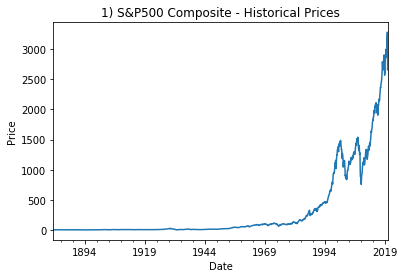

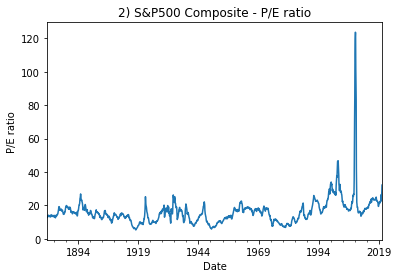

The average P/E ratio for stocks in the S&P500 has been:  16.123217668551018
The average P/E ratio (1881-1990):  13.834232941121705
The average P/E ratio (1990-2020):  24.303523743626197


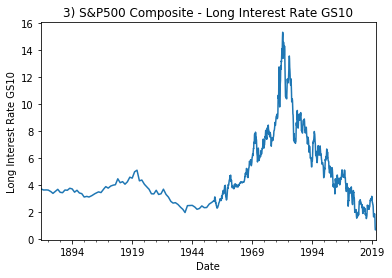

The highest level in Long Interest Rates GS10 is  15.32  in  [datetime.date(1981, 9, 1)]


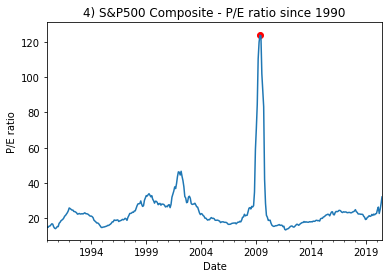

The highest P/E ratio in the last 30 years is:  123.73080438756855  in [datetime.date(2009, 5, 1)]


In [239]:
df["Price"].plot()
plt.title("1) S&P500 Composite - Historical Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()
df["P/E ratio"].plot()
plt.title("2) S&P500 Composite - P/E ratio")
plt.xlabel("Date")
plt.ylabel("P/E ratio")
plt.show()
pe_avg = df["P/E ratio"].mean()
print("The average P/E ratio for stocks in the S&P500 has been: ", pe_avg)
print("The average P/E ratio (1881-1990): ", df_["P/E ratio"].mean())
print("The average P/E ratio (1990-2020): ", df30y["P/E ratio"].mean())
df["Long Interest Rate GS10"].plot()
plt.title("3) S&P500 Composite - Long Interest Rate GS10")
plt.xlabel("Date")
plt.ylabel("Long Interest Rate GS10")
plt.show()
interest_rates_max = df["Long Interest Rate GS10"].max()
print("The highest level in Long Interest Rates GS10 is ", 
      interest_rates_max, " in " ,
      df.index.date[df["Long Interest Rate GS10"] == interest_rates_max])

thirty_year_max = df30y["P/E ratio"].max()
date_30y_max = df30y.index.date[df30y["P/E ratio"] == thirty_year_max]
df30y["P/E ratio"].plot()
plt.scatter(date_30y_max, thirty_year_max, color="red")
plt.title("4) S&P500 Composite - P/E ratio since 1990")
plt.xlabel("Date")
plt.ylabel("P/E ratio")
plt.show()
print("The highest P/E ratio in the last 30 years is: ", thirty_year_max, " in",
      date_30y_max)

The image 1) shows the historical S&P500 Composite's prices since 1881. We can see in the last 30 years there were 3 bull markets and 2 market crashes during the dot-com bubble in early 2000s and the financial crisis in 2008.

The second image shows P/E ratio of the S&P500 in the same time period. The P/E ratio is equal to the price divided by the TTM (trailing-twelve-months) earnings and can be used by investors to understand whether a stock or the entire market is or is not overvalued.
For example, a above average S&P500, P/E ratio may indicate that the market is overvalued. Instead, when P/E ratio is below average, the market might be undervalued. 
We cannot consider P/E ratio as an absolute metric because the market is influenced heavily by other factors.
Interest rates can help us understand the reason why P/E ratio in the last 30 years has been usually higher than the previous P/E ratios (The average P/E ratio from 1881 to 1990 had been 13.8 while from 1990 to 2020 has been 24.3).
Interest rates peaked in 1981 and had been decreasing steadily until 2020 when they hit almost 0. But, what does interest rates mean for stocks? 
When the interest are lower, future cash flow are discounted with a lower discount rate to find the present value of those future cash flows. That makes future cash flows more valuable. In 2020 we have interest rates near to 0, which means that the risk-free rate (10 year treasury bond's yield) is almost 0, which means the discount rate is equal to the risk premium.
If there is no return in Tresury Bonds (or a negative real return) investors have to invest in equity. That could cause high valuation like the one we are seeing in the last 30 years.

P/E ratio is not the better metrics to use to evaluate the market. We can see that the highest P/E ratio in the last 30 years has been in 2009 at a ratio of 123. The markets seem to be extremely overvalued but, instead, it was just the beginning of one of the greatest bull markets in history that last until March 2020, when the market crashed due to Covid-19 pandemic.

Another metric has performed better than P/E ratio. This metric is the CAPE ratio.

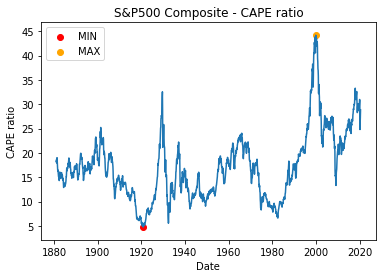

The CAPE ratio was at its lows in [datetime.date(1920, 12, 1)]  at  4.7842410450832515
The CAPE ratio was at its lows in [datetime.date(1999, 12, 1)]  at  44.19793976104054
In 1929 the market peaked at 32.563788598776696


In [240]:
fig, ax = plt.subplots()

min_ = df["CAPE ratio"].min()
date_min = df.index.date[df["CAPE ratio"] == min_]
max_ = df["CAPE ratio"].max()
date_max = df.index.date[df["CAPE ratio"] == max_]
crash_29_max = df["CAPE ratio"].where((df.index.year == 1929)).max()

ax.plot(df["CAPE ratio"])
ax.scatter(date_min, min_, color="red", label="MIN")
ax.scatter(date_max, max_, color="orange", label="MAX")
plt.title("S&P500 Composite - CAPE ratio")
plt.xlabel("Date")
plt.ylabel("CAPE ratio")
ax.legend()
plt.show()
print("The CAPE ratio was at its lows in", date_min, " at ", min_)
print("The CAPE ratio was at its lows in", date_max, " at ", max_)
print("In 1929 the market peaked at", crash_29_max)

The CAPE ratio or Cyclically Adjusted P/E ratio was popularized by Robert J. Shiller at the Yale University because it predicted with accuracy whether the market was overvalued or not.
The CAPE ratio is equal to P/E ratio but it uses real earnings per share(adjusted for inflation) over a ten year period, in order to smooth out fluctuation in profit that occurs in the business cycle.
When the CAPE ratio is high (for example, in 1929, 2000) it means that the market is overvalued. Instead when the CAPE ratio is low, the market is undervalued.
The CAPE ratio predicted the second greatest bull market in history that ended in 1929 when CAPE ratio peaked at 32.5.
In the early 1980s the market started his greated bull market that lasted until 2000 when the market crashed after the dot-com bubble that brought CAPE ratio at an insane level of 44.2 in 1999.
As we can see CAPE ratio performed very well at evaluating the market.

In [241]:
df["Year"] = df.index.year

In [242]:
year = df.groupby(["Year"])
dividends = year["Dividends"].sum()
years = df["Year"].drop_duplicates()
year_df = pd.DataFrame(dividends, years)
year_df.drop(year_df.index[-1], inplace=True)
year_df

,Dividends
Year,
1881,3.510000
1882,3.840000
1883,3.905000
1884,3.830000
1885,3.265000
...,...
2015,501.400000
2016,534.900000
2017,568.870000


In [243]:
df.head()

,Price,Dividends,Earnings,Long Interest Rate GS10,CAPE ratio,P/E ratio,Year
Date,,,,,,,
1881-01-01,6.19,0.265,0.4858,3.7,18.474,12.7419,1881
1881-02-01,6.17,0.27,0.4817,3.69333,18.1473,12.8088,1881
1881-03-01,6.24,0.275,0.4775,3.68667,18.2701,13.0681,1881
1881-04-01,6.22,0.28,0.4733,3.68,17.9501,13.1418,1881
1881-05-01,6.5,0.285,0.4692,3.67333,18.8697,13.8534,1881


In [244]:
df.reset_index(inplace=True)

In [245]:
df.set_index("Year", inplace=True)

In [247]:
y = pd.date_range(start=df["Date"].min(), end=df["Date"].max(), freq="Y")
x = pd.date_range(start=df["Date"].min(), end=df["Date"].max(), freq="AS")
x = x[:-1]
type(x)

pandas.core.indexes.datetimes.DatetimeIndex

In [248]:
y = y.to_period('M')

In [249]:
len(x) == len(y)

True

In [250]:
df[df["Date"].dt.to_period("M") == y[0]]["Price"]

Year
1881    6.01
Name: Price, dtype: object

In [251]:
df[df["Date"] == x[0]]["Price"]

Year
1881    6.19
Name: Price, dtype: object

In [253]:
starting_price = pd.Series([], dtype=float)
ending_price = pd.Series([], dtype=float)
for i in range(len(x)):
    ending_price = ending_price.append(df[df["Date"].dt.to_period("M") == y[i]]["Price"])
    starting_price = starting_price.append(df[df["Date"] == x[i]]["Price"])

In [258]:
year_df["Starting Price"] = starting_price
year_df["Ending Price"] = ending_price

In [260]:
year_df["Annual Total Return"] = year_df["Ending Price"] - year_df["Starting Price"] + year_df["Dividends"]

In [262]:
year_df["% Annual Total Return"] = year_df["Annual Total Return"] / year_df["Starting Price"] * 100

In [263]:
year_df

,Dividends,Starting Price,Ending Price,Annual Total Return,% Annual Total Return
Year,,,,,
1881,3.510000,6.19,6.01,3.33,53.7964
1882,3.840000,5.92,5.84,3.76,63.5135
1883,3.905000,5.81,5.34,3.435,59.1222
1884,3.830000,5.18,4.34,2.99,57.722
1885,3.265000,4.24,5.2,4.225,99.6462
...,...,...,...,...,...
2015,501.400000,2028.18,2054.08,527.3,25.9987
2016,534.900000,1918.6,2246.63,862.93,44.9771
2017,568.870000,2275.12,2664.34,958.09,42.1116
